In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [14]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [15]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Random Selection

In [16]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0

for n in range(1, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

## Histogram

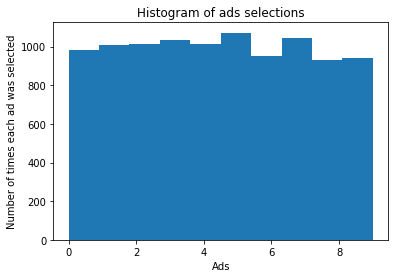

In [17]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [18]:
total_reward

1261

## Implementing UCB

In [19]:
N = 10000
d = 10
ads_selected = []

In [20]:
number_of_selections = [0] * d
sums_of_rewards = [0] * d

In [21]:
total_reward = 0

In [22]:
for n in range(0,N):
    max_upper_bound = 0
    ad = 0
    
    for i in range(0, d):
        if number_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1)/ number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Histogram

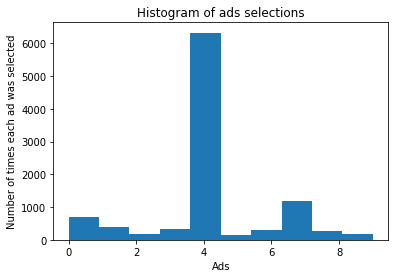

In [25]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()